# qosf: Task 2
## Objective: To optimise a parametric quantum circuit of choice to return $|01\rangle$ and $|10\rangle$ with equal probabilities
## Constraints:
- The circuit should be a combination of gates fromed using the gates $R_x$,$R_y$ and $CNOT$, where:
\begin{align}
R_x(\theta)=&cos(\theta/2)\cdot\mathbb{1}+isin(\theta/2)\cdot\sigma_x\\
R_y(\theta)=&cos(\theta/2)\cdot\mathbb{1}+isin(\theta/2)\cdot\sigma_y\\
\end{align}
- Input to the circuit is taken to be $|00\rangle$.
- Parameters of the gates to be optimised by performing $n=1,10,100,1000$ quantum measurements with noise.

## Sketch of the solution:
### I propose the following quantum circuit, as I know at least 2 possible ways $(a,b,c)=(\pi/2,\pi/2,\pi)$ and $(a,b,c)=(\pi,\pi/2,\pi)$ to obtain the desired output, that is, equal superposition of  $|01\rangle$ and $|10\rangle$.

<div>
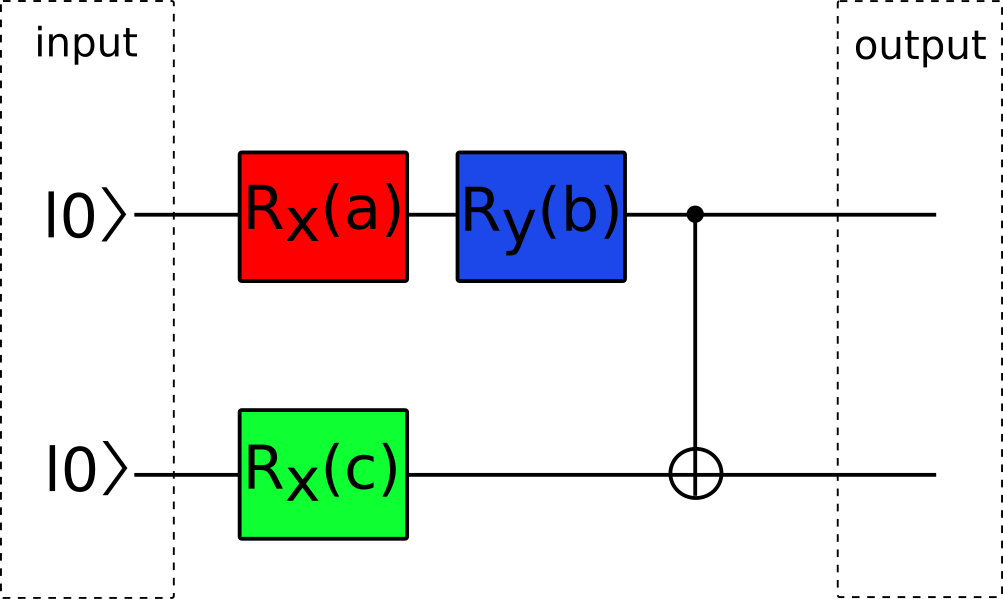
</div>

### In order to find the action of this circuit on the input state $|00\rangle$, we first compute the action of the operators prior to $CNOT$, then take the $CNOT$ on the resultant two qubit state. Following is the algebra:

### Top branch:
- $R_x(a)|0\rangle=[cos\frac{a}{2}\cdot\mathbb{1}+isin\frac{a}{2}\cdot\sigma_x]|0\rangle=cos\frac{a}{2}|0\rangle+isin\frac{a}{2}|1\rangle$
- $R_y(b)|0\rangle=[cos\frac{b}{2}\cdot\mathbb{1}+isin\frac{b}{2}\cdot\sigma_y]|0\rangle=cos\frac{b}{2}|0\rangle-sin\frac{b}{2}|1\rangle$
- $R_y(b)|1\rangle=[cos\frac{b}{2}\cdot\mathbb{1}+isin\frac{b}{2}\cdot\sigma_y]|1\rangle=cos\frac{b}{2}|1\rangle+sin\frac{b}{2}|0\rangle$
<br><br>
- $R_y(b)\cdot R_x(a)|0\rangle=R_y(b)\cdot[cos\frac{a}{2}|0\rangle+isin\frac{a}{2}|1\rangle]$
<br>
$=cos\frac{a}{2}\cdot [R_y(b)|0\rangle]+isin\frac{a}{2}\cdot [R_y(b)|1\rangle]$
<br>
$=cos\frac{a}{2}\cdot [cos\frac{b}{2}|0\rangle-sin\frac{b}{2}|1\rangle]+isin\frac{a}{2}\cdot[cos\frac{b}{2}|1\rangle+sin\frac{b}{2}|0\rangle]$
<br>
$=[cos\frac{a}{2}cos\frac{b}{2}+isin\frac{a}{2}sin\frac{b}{2}]|0\rangle+[-cos\frac{a}{2}sin\frac{b}{2}+isin\frac{a}{2}cos\frac{b}{2}]|1\rangle$

### Bottom branch:
- $R_x(c)|0\rangle=[cos\frac{c}{2}\cdot\mathbb{1}+isin\frac{c}{2}\cdot\sigma_x]|0\rangle=cos\frac{c}{2}|0\rangle+isin\frac{c}{2}|1\rangle$

### Taking tensor product (just before CNOT):
- $[R_y(b)\cdot R_x(a)|0\rangle] \otimes R_x(c)|0\rangle$
<br>
$=|00\rangle[cos\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}]$
<br>
$+\ |01\rangle[icos\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |10\rangle[-cos\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}]$
<br>
$+\ |11\rangle[-icos\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}]$

### Apply CNOT (that is swap $|10\rangle\leftrightarrow|11\rangle$):
- Output state is given by, $|\psi\rangle$
<br><br>
$=|00\rangle[cos\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}]$
<br>
$+\ |01\rangle[icos\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |10\rangle[-icos\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |11\rangle[-cos\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}]$
<br><br>
$\equiv f_0|00\rangle+f_1|01\rangle+f_2|10\rangle+f_3|11\rangle$


In [1]:
import numpy as np 
import random as rd
from numpy import sin,cos 
import matplotlib.pyplot as plt

In [2]:
def prob_from_measurement(a,b,c,n_meas=1):
    
    p0=cos(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)
    p1=sin(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)
    p2=sin(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)
    p3=cos(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)

    meas_outcomes=rd.choices([0,1,2,3],[p0,p1,p2,p3],k=n_meas)
    P0=meas_outcomes.count(0)/n_meas
    P1=meas_outcomes.count(1)/n_meas
    P2=meas_outcomes.count(2)/n_meas
    P3=meas_outcomes.count(3)/n_meas

    return P0,P1,P2,P3 

In [3]:
def loss_function(p0,p1,p2,p3):
    return p0**2+(p1-0.5)**2+(p2-0.5)**2+p3**2

In [4]:
def gradient(a,b,c,p0,p1,p2,p3):

    grad_a=sin(a)*cos(b)*(cos(c/2)**2*(p3-p0)+sin(c/2)**2*(p2-p1))
    grad_b=sin(b)*cos(a)*(cos(c/2)**2*(p3-p0)+sin(c/2)**2*(p2-p1))
    grad_c_term1=sin(c)*((cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)*(p1-p0-0.5))
    grad_c_term2=sin(c)*((cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)*(p3-p2+0.5))
    grad_c=grad_c_term1+grad_c_term2
    return grad_a,grad_b,grad_c

In [8]:
def gradient_descent(err=10**-8,rate=1,max_steps=10000,n_meas=10):
    #err=0.01,rate=1,max_steps=100,n_meas=100
    a=0.1;b=0.1;c=0.1	
    # a,b,c=np.random.uniform(0.1,3.14,3)
    step=1
    P0,P1,P2,P3=prob_from_measurement(a,b,c,n_meas)
    grad=np.array(gradient(a,b,c,P0,P1,P2,P3))
    a-=grad[0]*rate
    b-=grad[1]*rate
    c-=grad[2]*rate
    e=loss_function(P0,P1,P2,P3)
    print('step:%d|  a:%0.5f b:%0.5f c:%0.5f|  error:%0.2e|  prob: %.2f,%.2f,%.2f,%.2f'%(step,a,b,c,e,P0,P1,P2,P3))	
    while(e>err and step<max_steps):
        step+=1
        P0,P1,P2,P3=prob_from_measurement(a,b,c,n_meas)
        grad=np.array(gradient(a,b,c,P0,P1,P2,P3))
        a-=grad[0]*rate
        b-=grad[1]*rate
        c-=grad[2]*rate
        e=loss_function(P0,P1,P2,P3)
        print('step:%d|  a:%0.5f b:%0.5f c:%0.5f|  error:%0.2e|  prob: %.2f,%.2f,%.2f,%.2f'%(step,a,b,c,e,P0,P1,P2,P3))	
    return a

In [9]:
def plot_bc(a):
    fig,ax=plt.subplots(figsize=(6,6))
    b = np.arange(0, np.pi+0.2, 0.1)
    c = np.arange(0, 2*np.pi+0.2, 0.1)
    b, c = np.meshgrid(b, c)
    p0=cos(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)
    p1=sin(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)
    p2=sin(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)
    p3=cos(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)
    Z=p0**2+(p1-0.5)**2+(p2-0.5)**2+p3**2

    cf=ax.contourf(b,c,Z)
    fig.colorbar(cf, ax=ax)
    ax.set_xlabel('$b$', fontsize=20)
    ax.set_title('$a=%0.2f$'%(a),fontsize=20)
    ax.set_ylabel('$c$',fontsize=20)
    plt.show()

step:1|  a:0.19909 b:0.19909 c:0.24876|  error:1.50e+00|  prob: 1.00,0.00,0.00,0.00
step:2|  a:0.38997 b:0.38997 c:0.60842|  error:1.50e+00|  prob: 1.00,0.00,0.00,0.00
step:3|  a:0.58201 b:0.58201 c:1.26886|  error:1.18e+00|  prob: 0.80,0.00,0.00,0.20
step:4|  a:0.82527 b:0.82527 c:1.76409|  error:6.20e-01|  prob: 0.60,0.40,0.00,0.00
step:5|  a:0.97479 b:0.97479 c:1.89957|  error:1.80e-01|  prob: 0.30,0.50,0.20,0.00
step:6|  a:1.11416 b:1.11416 c:2.04868|  error:3.40e-01|  prob: 0.40,0.40,0.10,0.10
step:7|  a:1.15373 b:1.15373 c:2.10048|  error:1.00e-01|  prob: 0.20,0.40,0.30,0.10
step:8|  a:1.11670 b:1.11670 c:2.17128|  error:2.60e-01|  prob: 0.20,0.20,0.30,0.30
step:9|  a:1.17839 b:1.17839 c:2.08877|  error:2.00e-02|  prob: 0.00,0.60,0.40,0.00
step:10|  a:1.21373 b:1.21373 c:2.10148|  error:2.00e-02|  prob: 0.10,0.50,0.40,0.00
step:11|  a:1.08193 b:1.08193 c:2.46754|  error:2.40e-01|  prob: 0.20,0.10,0.70,0.00
step:12|  a:1.22964 b:1.22964 c:2.34270|  error:8.00e-02|  prob: 0.00,0.70

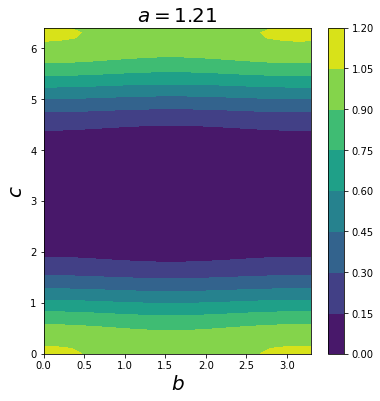

In [10]:
a=gradient_descent()
plot_bc(a)